In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
data=pd.read_csv('fifa_eda.csv')
data=data.iloc[:5001,:]

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        5001 non-null   int64  
 1   Name                      5001 non-null   object 
 2   Age                       5001 non-null   int64  
 3   Nationality               5001 non-null   object 
 4   Overall                   5001 non-null   int64  
 5   Potential                 5001 non-null   int64  
 6   Club                      4930 non-null   object 
 7   Value                     4927 non-null   float64
 8   Wage                      5001 non-null   float64
 9   Preferred Foot            5001 non-null   object 
 10  International Reputation  5001 non-null   float64
 11  Skill Moves               5001 non-null   float64
 12  Position                  5001 non-null   object 
 13  Joined                    5001 non-null   int64  
 14  Contract

### 1)Data Cleaning

In [35]:
data.shape
#The data consists of 18207 samples/rows and 18 features/columns

(5001, 18)

In [36]:
data.isna().sum()

ID                           0
Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                        71
Value                       74
Wage                         0
Preferred Foot               0
International Reputation     0
Skill Moves                  0
Position                     0
Joined                       0
Contract Valid Until        71
Height                       0
Weight                       0
Release Clause               0
dtype: int64

In [37]:
categorical_columns=[]
numerical_columns=[]
for column in data.columns:
    if(data[column].dtype=='object'):
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)
print("The categorical columns are : ",categorical_columns)
print("The numerical columns are : ",numerical_columns)

The categorical columns are :  ['Name', 'Nationality', 'Club', 'Preferred Foot', 'Position', 'Contract Valid Until']
The numerical columns are :  ['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Skill Moves', 'Joined', 'Height', 'Weight', 'Release Clause']


In [38]:
nan_columns=[]
for column in data.columns:
    if(data[column].isna().sum()>0):
        nan_columns.append(column)
print(nan_columns)

['Club', 'Value', 'Contract Valid Until']


### All the categorical columns having missing values must be replaced by mode the most frequently occuring item

In [39]:
for column in categorical_columns:
    if(column in nan_columns):
        data[column]=data[column].fillna(data[column].mode()[0])
        nan_columns.remove(column)

In [40]:
data.isna().sum()

ID                           0
Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                         0
Value                       74
Wage                         0
Preferred Foot               0
International Reputation     0
Skill Moves                  0
Position                     0
Joined                       0
Contract Valid Until         0
Height                       0
Weight                       0
Release Clause               0
dtype: int64

In [41]:
print(nan_columns)
#Remaining columns are numerical columns only so we will replace by mean/median

['Value']


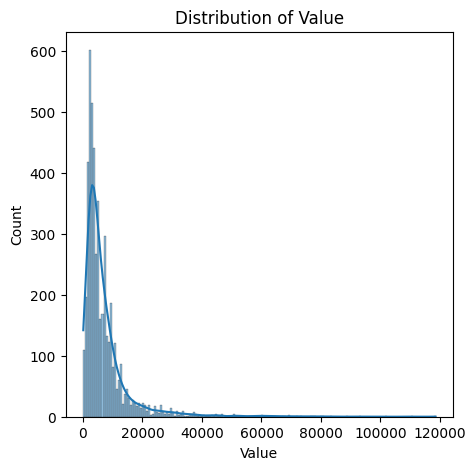

In [42]:
for column in nan_columns:
    plt.figure(figsize=(5,5))  
    sns.histplot(data[column], kde=True)  
    plt.title(f"Distribution of {column}")
    plt.show()


### The feature having symetric distribution should be filled with mean of data else if the feature has lot of outliers then it should be replaced by median<br>
-Here Value and International Reputation are skewed means with outliers having non symetrical distribution so we should replace these features by median<br>
-Skill moves has almost symetrical distribution so we can replace by mean<br>

In [43]:
data['Value']=data['Value'].fillna(data['Value'].median())
data['International Reputation']=data['International Reputation'].fillna(data['International Reputation'].median())
data['Skill Moves']=data['Skill Moves'].fillna(data['Skill Moves'].mean())

In [44]:
data.isna().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

In [45]:
data.duplicated().sum()

0

In [46]:
data.drop_duplicates(inplace=True)
data

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,161857,F. Klein,31,Austria,70,70,FK Austria Wien,1200.0,9.0,Right,2.0,3.0,RB,2017,2020-01-01,6.000000,159.0,1700.0
4997,183361,A. Weber,31,France,70,70,Stade Brestois 29,1200.0,4.0,Right,1.0,2.0,LCB,2017,2019-01-01,6.250000,181.0,2100.0
4998,200770,F. Haugen,26,Norway,70,73,SK Brann,2200.0,4.0,Right,1.0,3.0,RCM,2010,2021-01-01,6.000000,168.0,2900.0
4999,202050,T. Bruns,26,Netherlands,70,73,Vitesse,2200.0,8.0,Right,1.0,3.0,CM,2017,2021-01-01,5.833333,159.0,3400.0


In [47]:
print(categorical_columns)

['Name', 'Nationality', 'Club', 'Preferred Foot', 'Position', 'Contract Valid Until']


In [48]:
for column in categorical_columns:
    print(data[column].unique())

['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'F. Haugen' 'T. Bruns'
 'C. González']
['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria'
 'Greece' 'Chile' 'Sweden' 'Korea Republic' 'Finland' 'Guinea'
 'Montenegro' 'Armenia' 'Switzerland' 'Norway' 'Czech Republic' 'Scotland'
 'Ghana' 'Central African Rep.' 'DR Congo' 'Ivory Coast' 'Russia'
 'Ukraine' 'Iceland' 'Mexico' 'Jamaica' 'Albania' 'Venezuela' 'Japan'
 'Turkey' 'Ecuador' 'Paraguay' 'Mali' 'Nigeria' 'Cameroon'
 'Dominican Republic' 'Israel' 'Kenya' 'Hungary' 'Republic of Ireland'
 'Romania' 'United States' 'Cape Verde' 'Australia' 'Peru' 'Togo' 'Syria'
 'Zimbabwe' 'Angola' 'Burkina Faso' 'Iran' 'Estonia' 'Tunisia'
 'Equatorial Guinea' 'New Zealand' 'FYR Macedonia' 'United Arab Emirates'
 'China PR' 'G

In [49]:
import numpy as np
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)  # First Quartile (25th percentile)
    Q3 = data[col].quantile(0.75)  # Third Quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #Bounds for non outliers 

    outliers = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    print(f"Outliers in {col}: {outliers}")

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


Outliers in ID: 141
Outliers in Age: 5
Outliers in Overall: 213
Outliers in Potential: 19
Outliers in Value: 253
Outliers in Wage: 188
Outliers in International Reputation: 844
Outliers in Skill Moves: 8
Outliers in Joined: 199
Outliers in Height: 6
Outliers in Weight: 43
Outliers in Release Clause: 158


### We can handle the year month date column effectively and split it into date month and year columns separately

In [50]:
import datetime as dt
data['Contract Valid Until']=pd.to_datetime(data['Contract Valid Until'])
data['day']=data['Contract Valid Until'].dt.day
data['month']=data['Contract Valid Until'].dt.month
data['year']=data['Contract Valid Until'].dt.year
data.drop(['Contract Valid Until'],axis=1,inplace=True)
categorical_columns.remove('Contract Valid Until')

In [51]:
data

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Height,Weight,Release Clause,day,month,year
231,230225,Juiano Mestres,34,Brazil,82,82,Cruzeiro,6500.0,39.0,Right,1.0,2.0,RCB,2018,5.916667,181.0,12400.0,1,1,2021
419,230347,Welington Dano,30,Brazil,80,80,Cruzeiro,10500.0,34.0,Left,1.0,4.0,LB,2018,5.833333,152.0,20000.0,1,1,2021
420,230234,Everton Andrão,34,Brazil,80,80,Fluminense,4500.0,34.0,Right,1.0,2.0,CDM,2018,5.833333,165.0,8500.0,1,1,2021
439,214584,F. Armani,31,Argentina,80,80,River Plate,9000.0,22.0,Right,1.0,1.0,GK,2018,6.166667,194.0,12600.0,1,1,2022
564,230312,Gabri Prestão,26,Brazil,79,79,Internacional,9000.0,24.0,Right,1.0,1.0,GK,2018,6.083333,176.0,17100.0,1,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,202305,Lee Seung Gi,30,Korea Republic,70,70,Jeonbuk Hyundai Motors,1600.0,7.0,Right,1.0,3.0,CM,2013,5.833333,148.0,2100.0,1,1,2020
4994,204353,C. Forsyth,29,Scotland,70,70,Derby County,1300.0,22.0,Left,1.0,2.0,LB,2013,6.166667,183.0,2600.0,1,1,2020
4997,183361,A. Weber,31,France,70,70,Stade Brestois 29,1200.0,4.0,Right,1.0,2.0,LCB,2017,6.250000,181.0,2100.0,1,1,2019
4999,202050,T. Bruns,26,Netherlands,70,73,Vitesse,2200.0,8.0,Right,1.0,3.0,CM,2017,5.833333,159.0,3400.0,1,1,2021


### Exploratory Data Analysis

1)Univariate Analysis

In [52]:
for column in numerical_columns:
    print(f"The mean of the {column} feature is ",data[column].mean())
    print(f"The median of the {column} feature is ",data[column].median())
    print(f"The mode of the {column} feature is ",data[column].mode()[0])
    print(f"The variance of the {column} feature is ",data[column].var())
    print(f"The skewness of the {column} feature is ",data[column].skew())
    print("---------------------------------------------------------------")
    print("---------------------------------------------------------------")

The mean of the ID feature is  209494.6025991792
The median of the ID feature is  211923.5
The mode of the ID feature is  139058
The variance of the ID feature is  433737164.2765037
The skewness of the ID feature is  -0.6550925614401433
---------------------------------------------------------------
---------------------------------------------------------------
The mean of the Age feature is  26.577975376196992
The median of the Age feature is  26.0
The mode of the Age feature is  26
The variance of the Age feature is  14.250161345955211
The skewness of the Age feature is  0.19765594123218888
---------------------------------------------------------------
---------------------------------------------------------------
The mean of the Overall feature is  72.77530779753762
The median of the Overall feature is  72.0
The mode of the Overall feature is  71
The variance of the Overall feature is  3.571459877859123
The skewness of the Overall feature is  0.6917067456817522
------------------

C:\Users\mahap\AppData\Local\Temp\ipykernel_17220\994434368.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


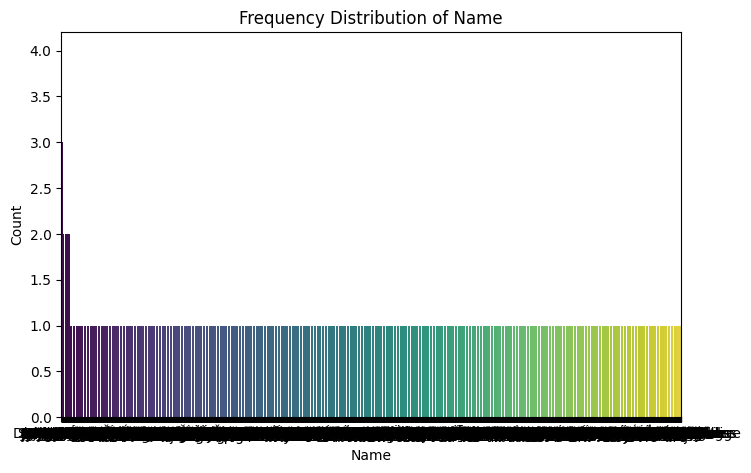

C:\Users\mahap\AppData\Local\Temp\ipykernel_17220\994434368.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


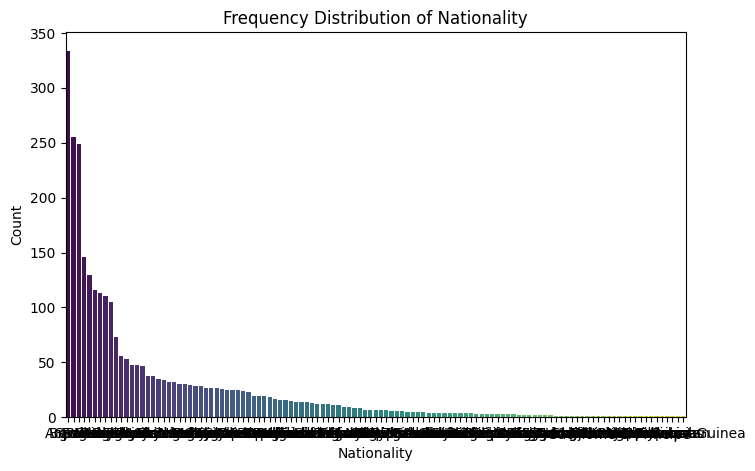

C:\Users\mahap\AppData\Local\Temp\ipykernel_17220\994434368.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


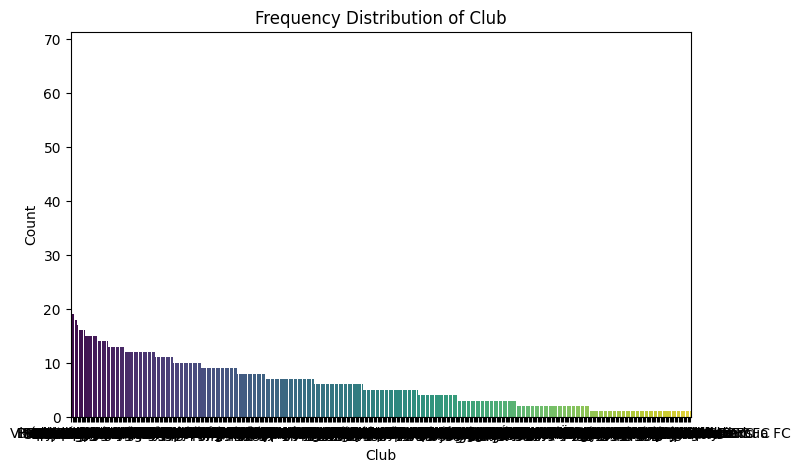

C:\Users\mahap\AppData\Local\Temp\ipykernel_17220\994434368.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


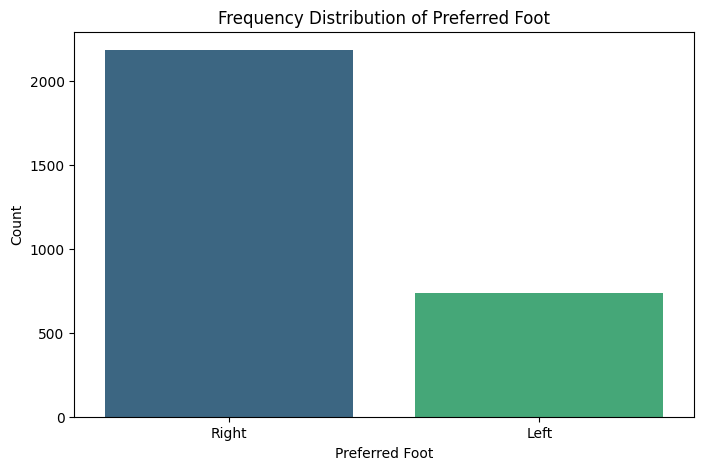

C:\Users\mahap\AppData\Local\Temp\ipykernel_17220\994434368.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


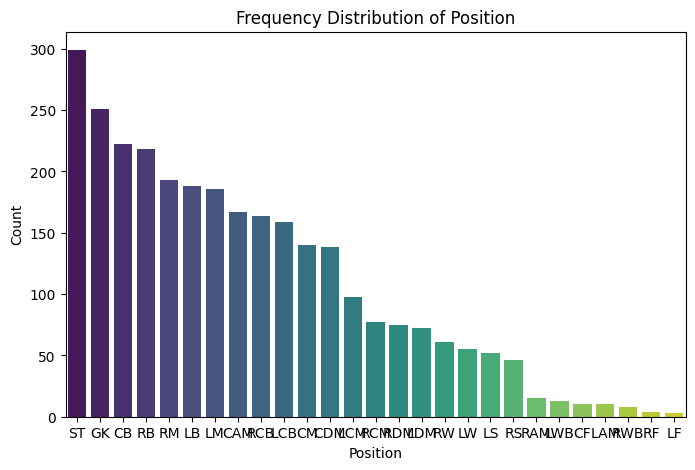

In [53]:
for column in categorical_columns:
    category_counts = data[column].value_counts()    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"Frequency Distribution of {column}")
    plt.show()

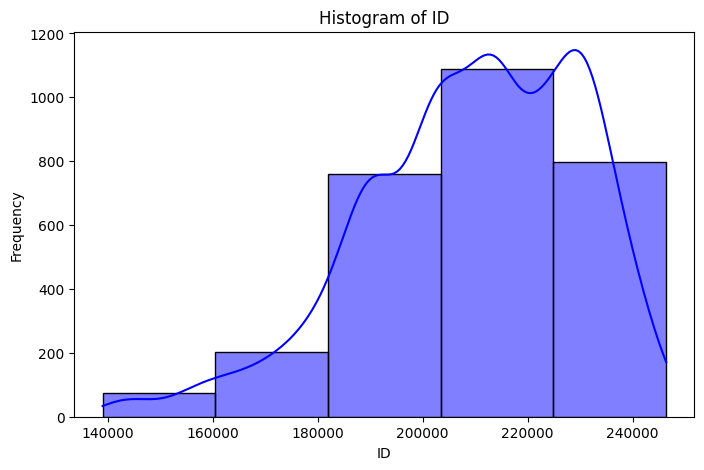

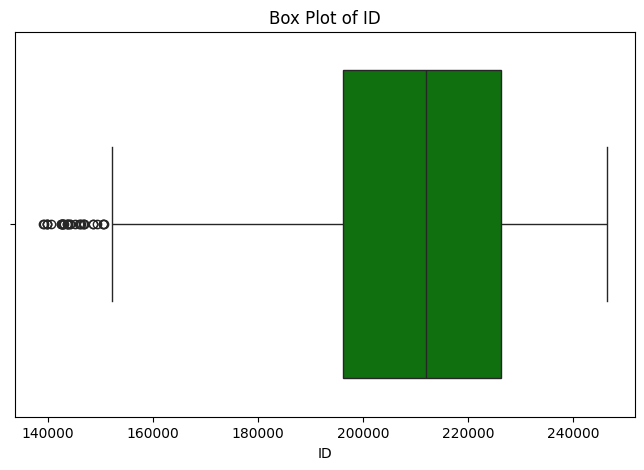

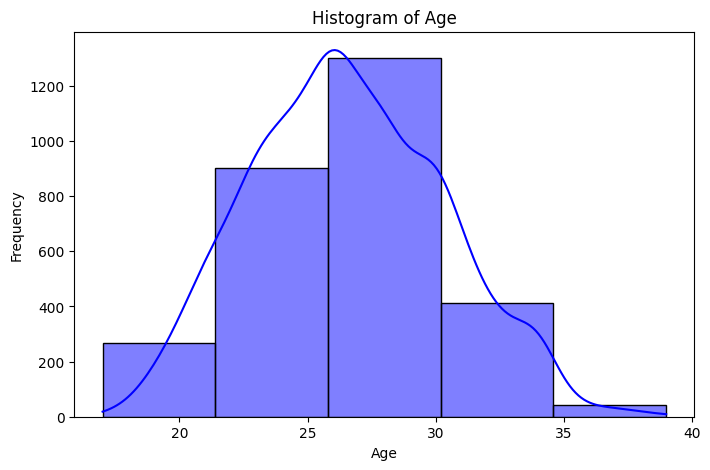

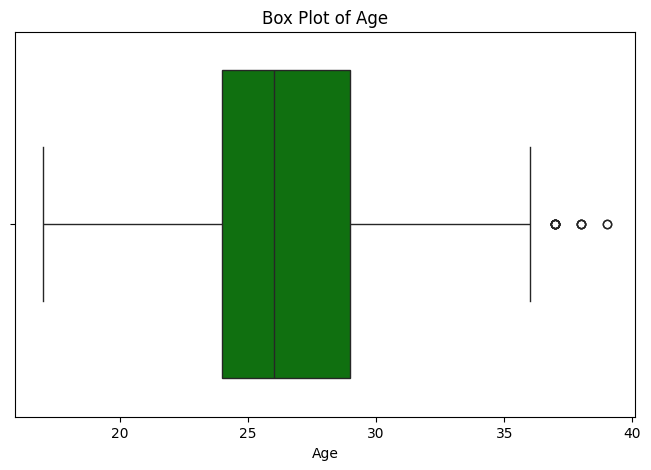

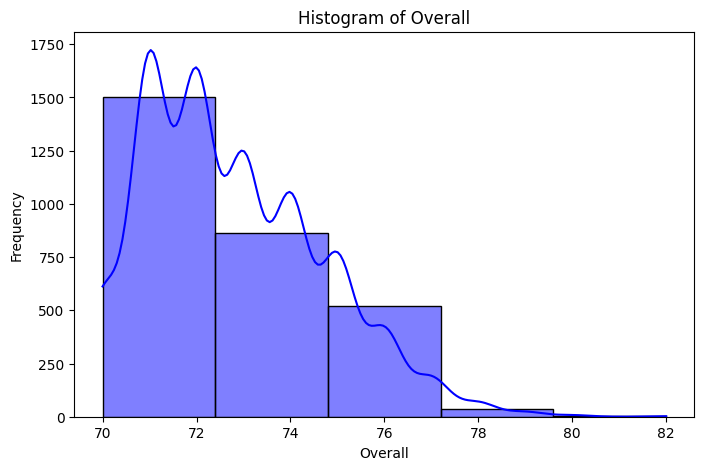

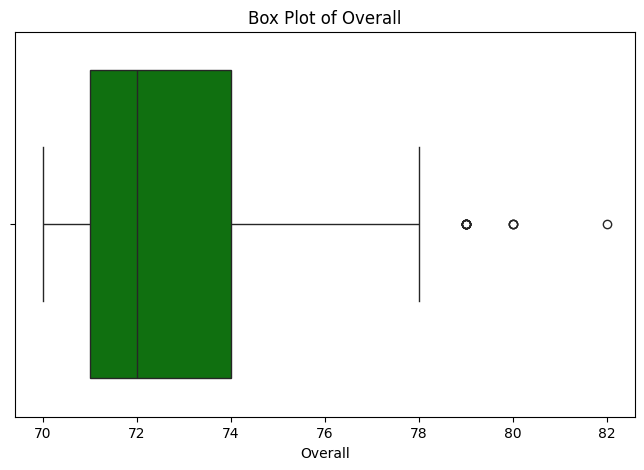

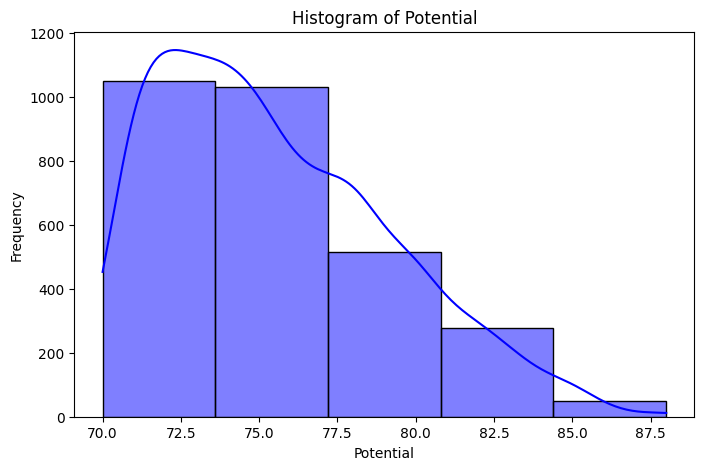

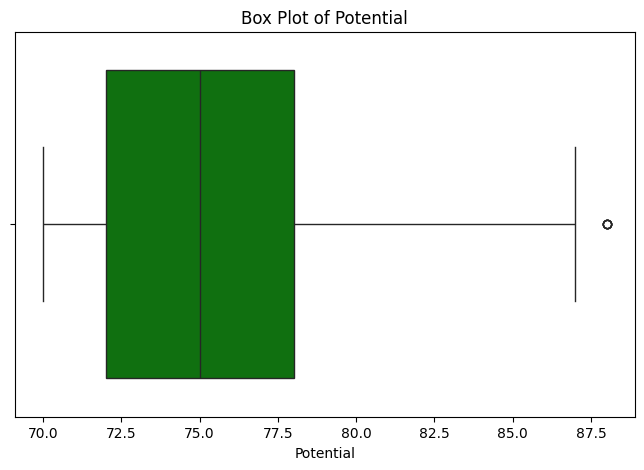

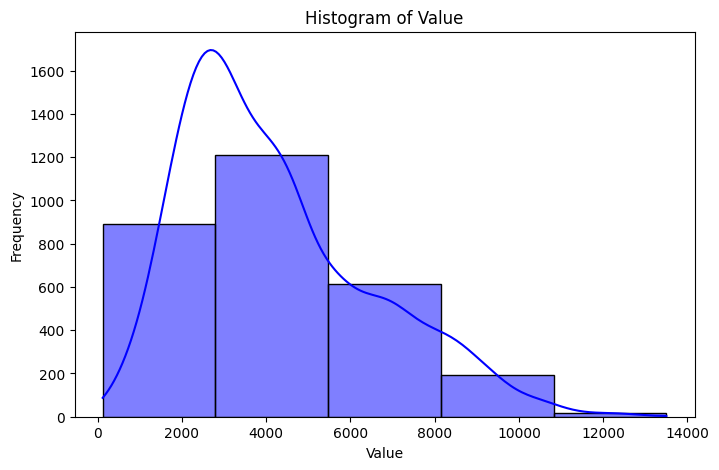

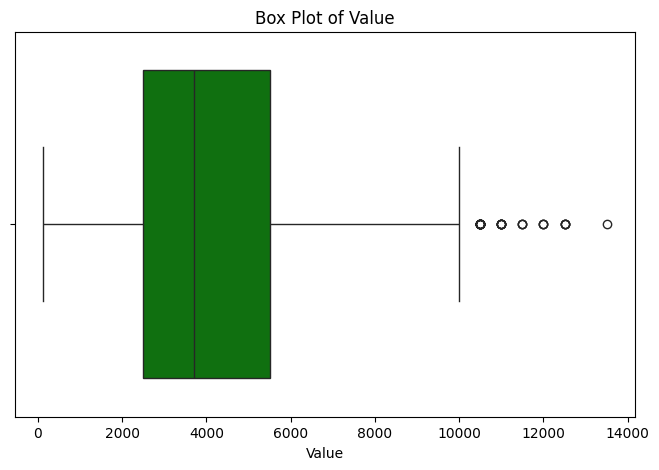

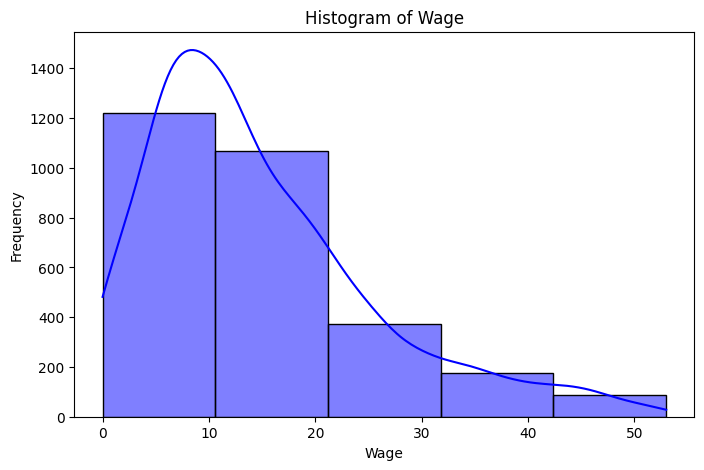

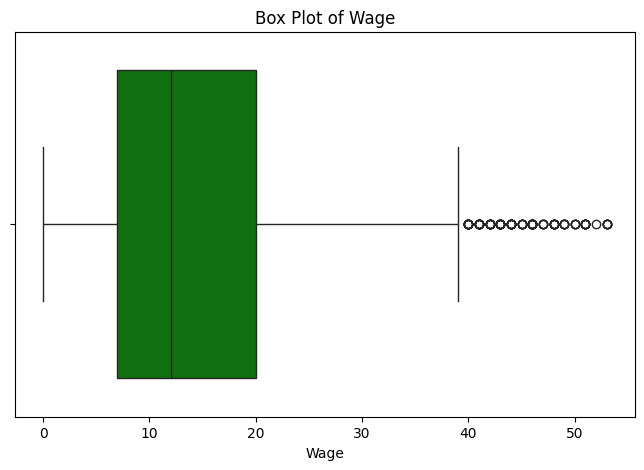

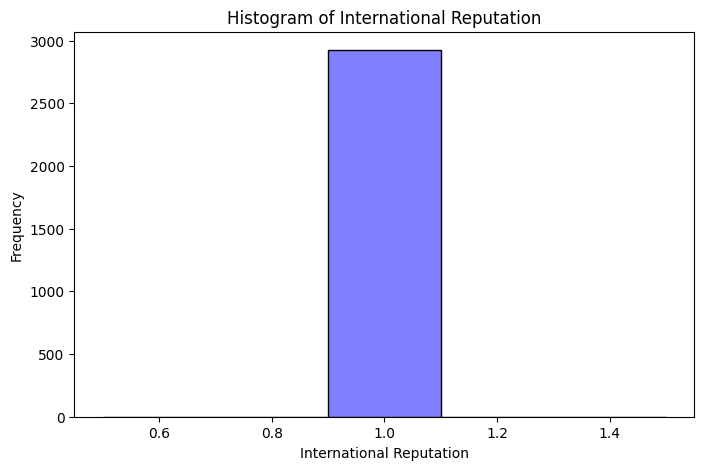

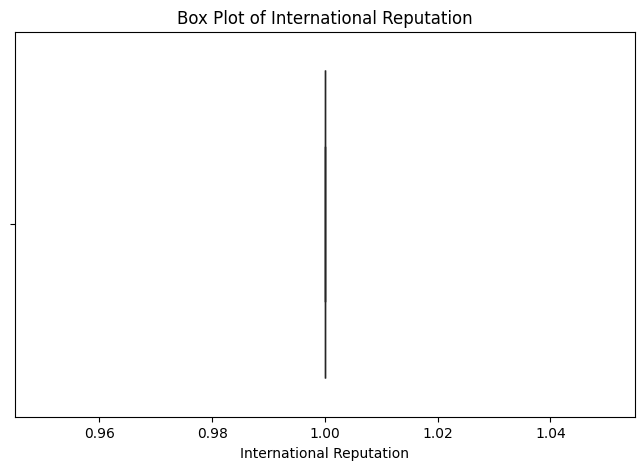

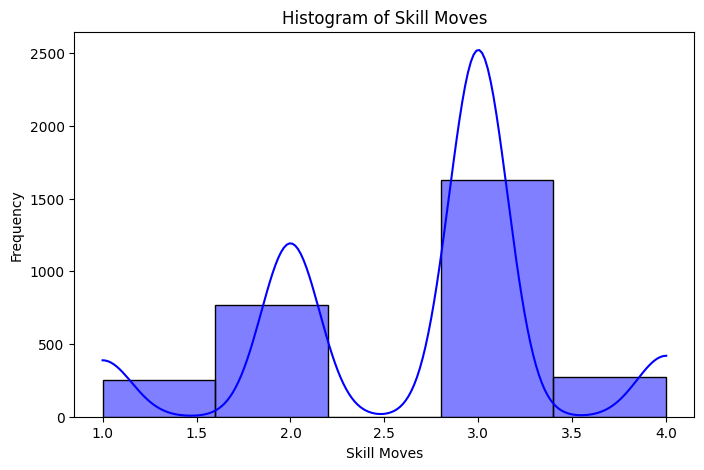

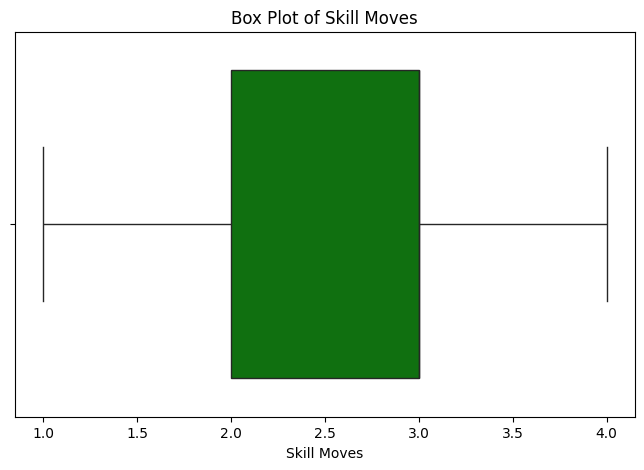

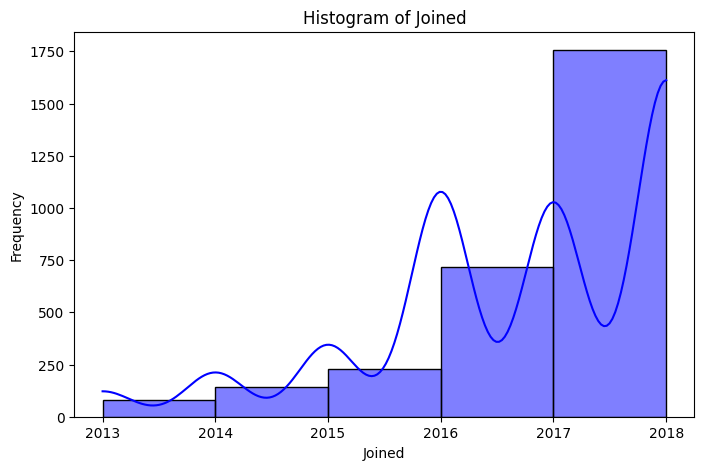

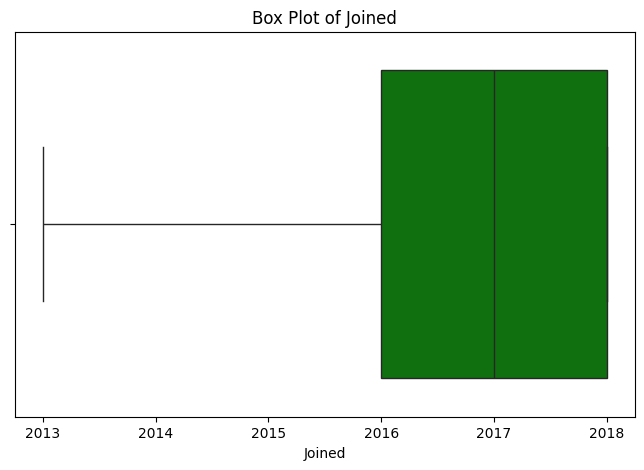

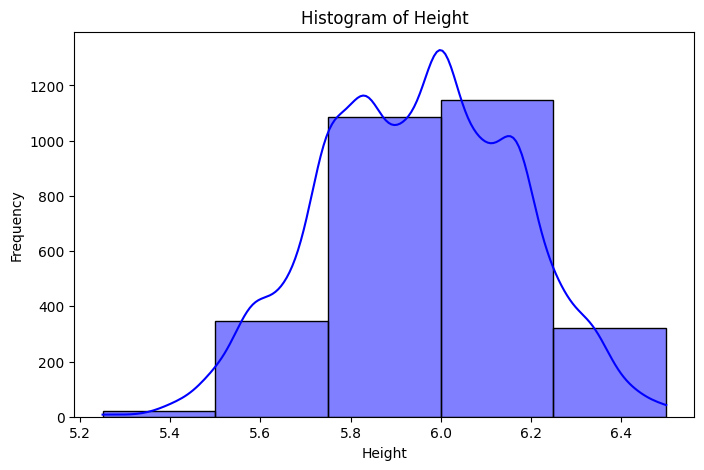

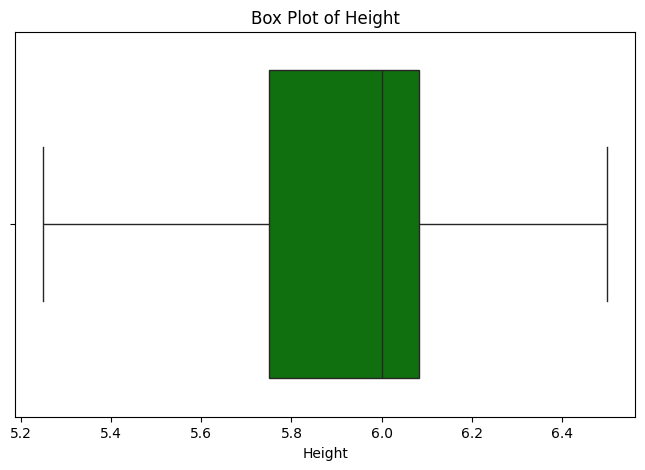

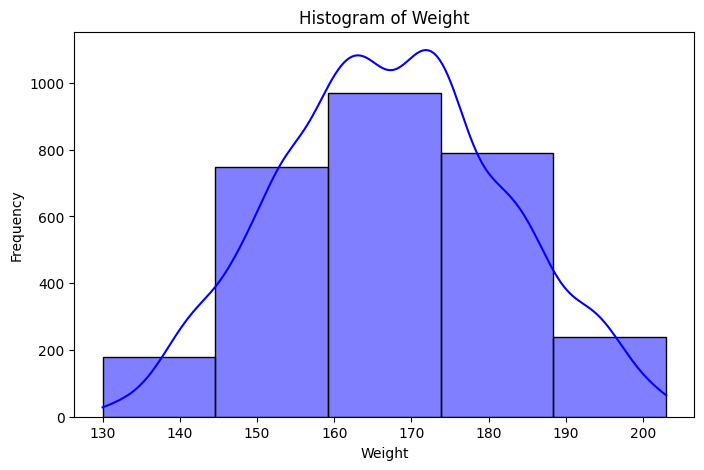

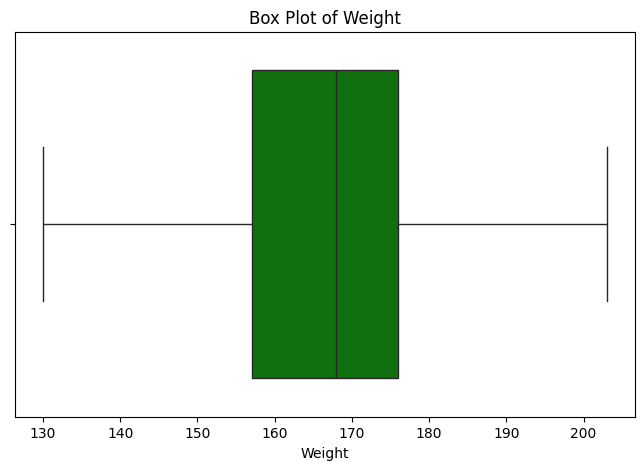

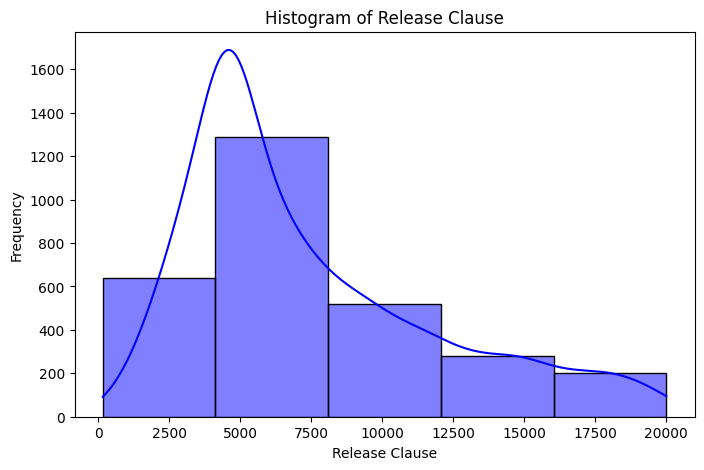

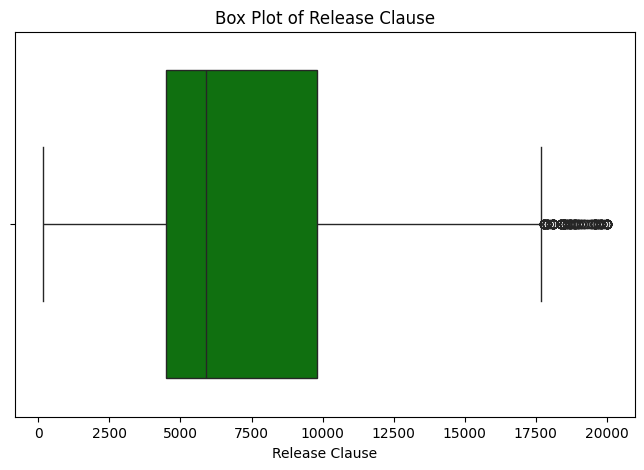

In [54]:
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], bins=5, kde=True, color='blue')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")
    plt.show()
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[column], color='green')
    plt.xlabel(column)
    plt.title(f"Box Plot of {column}")
    plt.show()
    

### Bivariate analysis

In [55]:
data[numerical_columns].corr()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
ID,1.000000,-0.612929,-0.023003,0.477689,0.251476,-0.035720,NaN,0.114104,0.046028,-0.072102,-0.096953,0.229324
Age,-0.612929,1.000000,0.039982,-0.743347,-0.434775,-0.094103,NaN,-0.185583,0.070901,0.035420,0.132086,-0.405388
Overall,-0.023003,0.039982,1.000000,0.426772,0.809389,0.424430,NaN,0.068515,-0.011428,-0.007354,0.025944,0.716447
Potential,0.477689,-0.743347,0.426772,1.000000,0.702320,0.250995,NaN,0.107631,-0.072634,0.004241,-0.070141,0.650504
Value,0.251476,-0.434775,0.809389,0.702320,1.000000,0.428217,NaN,0.269812,-0.033930,-0.083562,-0.082725,0.875385
Wage,-0.035720,-0.094103,0.424430,0.250995,0.428217,1.000000,NaN,0.132177,-0.022839,0.017326,0.001618,0.387055
International Reputation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Skill Moves,0.114104,-0.185583,0.068515,0.107631,0.269812,0.132177,NaN,1.000000,0.047887,-0.526363,-0.489646,0.214349
Joined,0.046028,0.070901,-0.011428,-0.072634,-0.033930,-0.022839,NaN,0.047887,1.000000,-0.020298,0.007695,0.025635
Height,-0.072102,0.035420,-0.007354,0.004241,-0.083562,0.017326,NaN,-0.526363,-0.020298,1.000000,0.753939,-0.063851


In [ ]:
sns.pairplot(data)

### Pair plot gives scatter plots of all possible pairs from the numerical columns along with that it also gives univariate distribution of single numerical columns along the diagonal

C:\Users\mahap\AppData\Local\Temp\ipykernel_17220\758089146.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_filtered[categorical_column], y=data_filtered[numerical_column], palette='coolwarm')


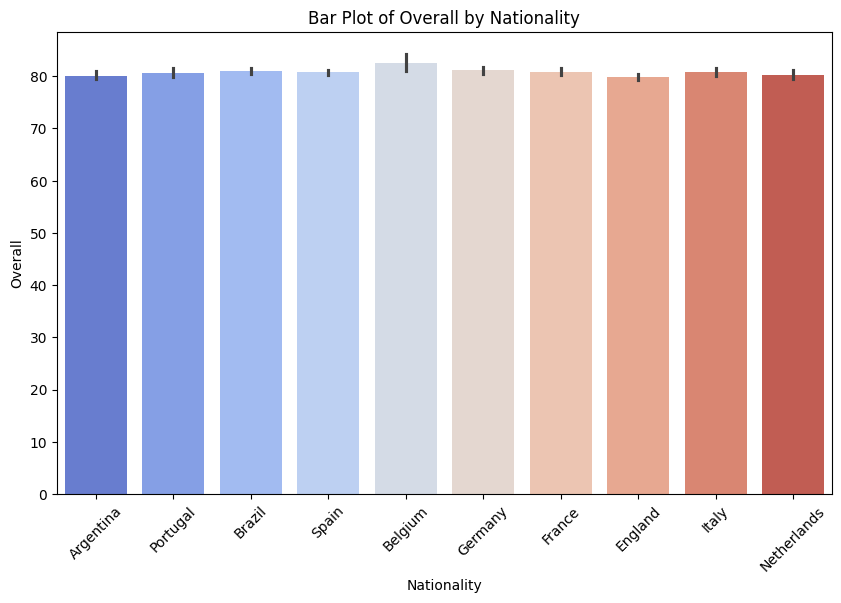

C:\Users\mahap\AppData\Local\Temp\ipykernel_17220\758089146.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data_filtered[categorical_column], y=data_filtered[numerical_column], palette='muted')


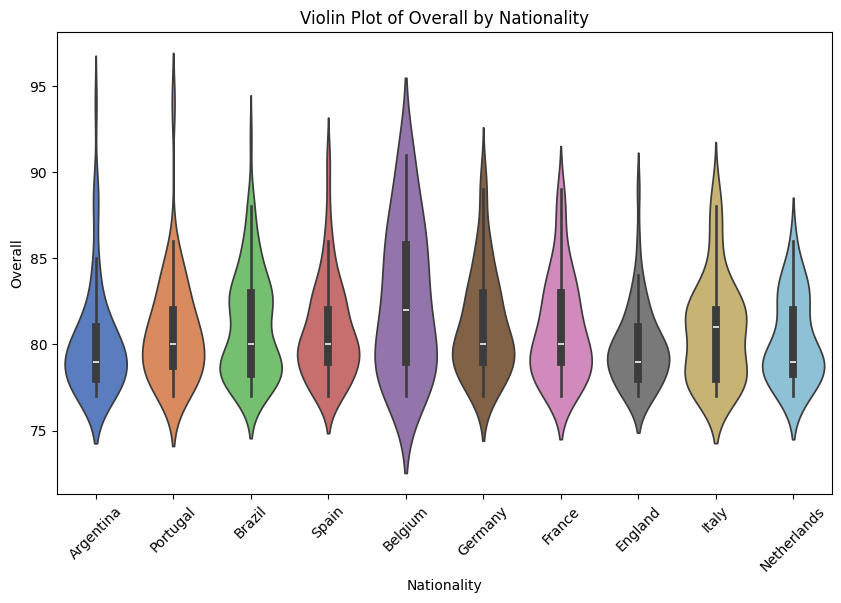

C:\Users\mahap\AppData\Local\Temp\ipykernel_17220\758089146.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_filtered[categorical_column], y=data_filtered[numerical_column], palette='pastel')


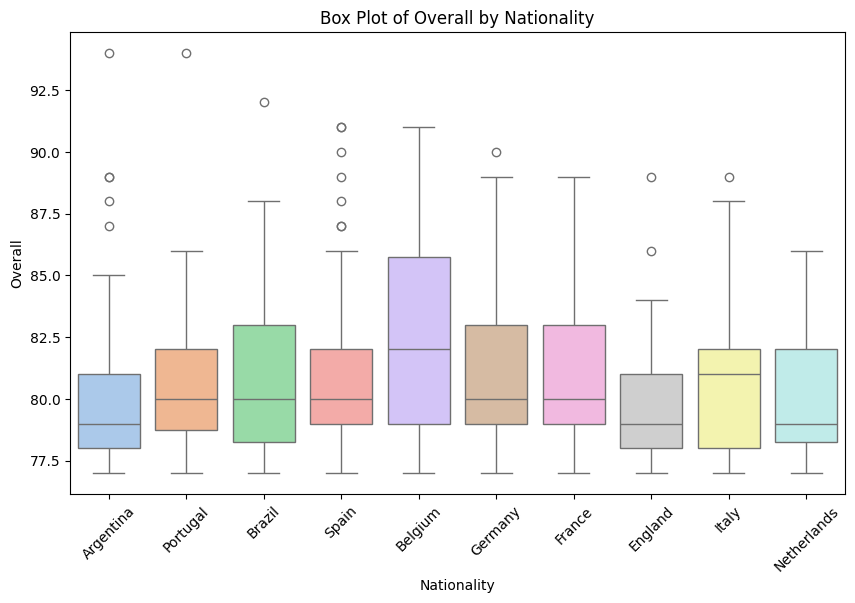

In [ ]:
categorical_column = 'Nationality'  # we can change as needed
numerical_column = 'Overall'  # we can change as needed
data_subset=data.iloc[:1001,:]
top_n = 10
top_categories = data_subset[categorical_column].value_counts().index[:top_n]
data_filtered = data_subset[data_subset[categorical_column].isin(top_categories)]

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=data_filtered[categorical_column], y=data_filtered[numerical_column], palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.title(f"Bar Plot of {numerical_column} by {categorical_column}")
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=data_filtered[categorical_column], y=data_filtered[numerical_column], palette='muted')
plt.xticks(rotation=45)
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.title(f"Violin Plot of {numerical_column} by {categorical_column}")
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_filtered[categorical_column], y=data_filtered[numerical_column], palette='pastel')
plt.xticks(rotation=45)
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.title(f"Box Plot of {numerical_column} by {categorical_column}")
plt.show()

### Multivariate analysis

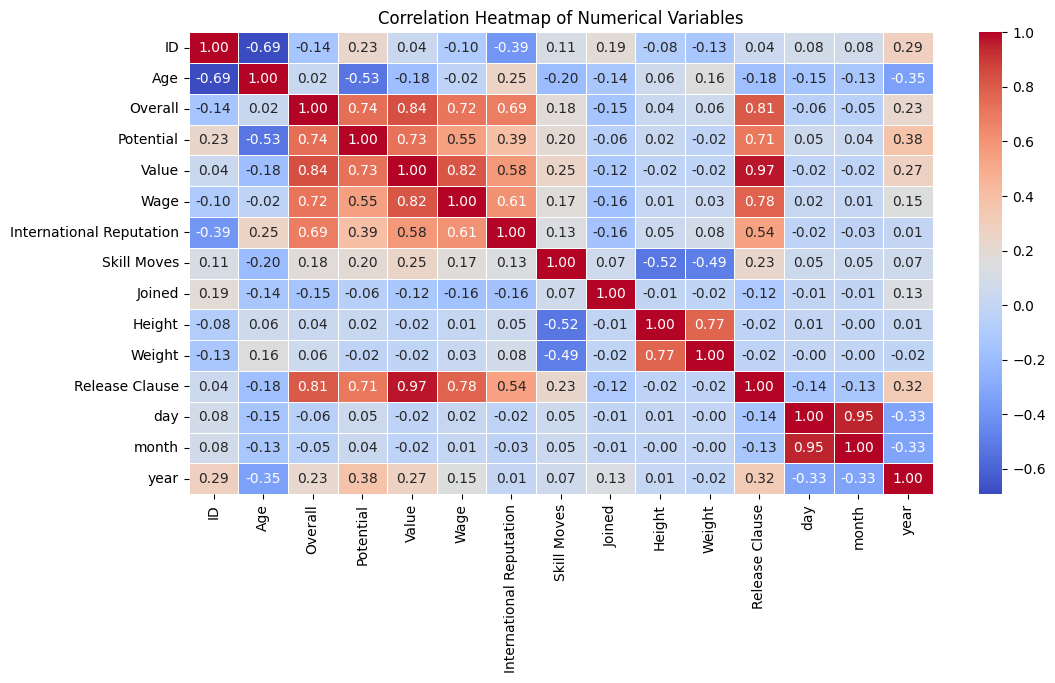

In [ ]:
corr_matrix = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

C:\Users\mahap\AppData\Local\Temp\ipykernel_17220\628790820.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_filtered[categorical_column], y=data_filtered[numerical_column], palette="Set2")


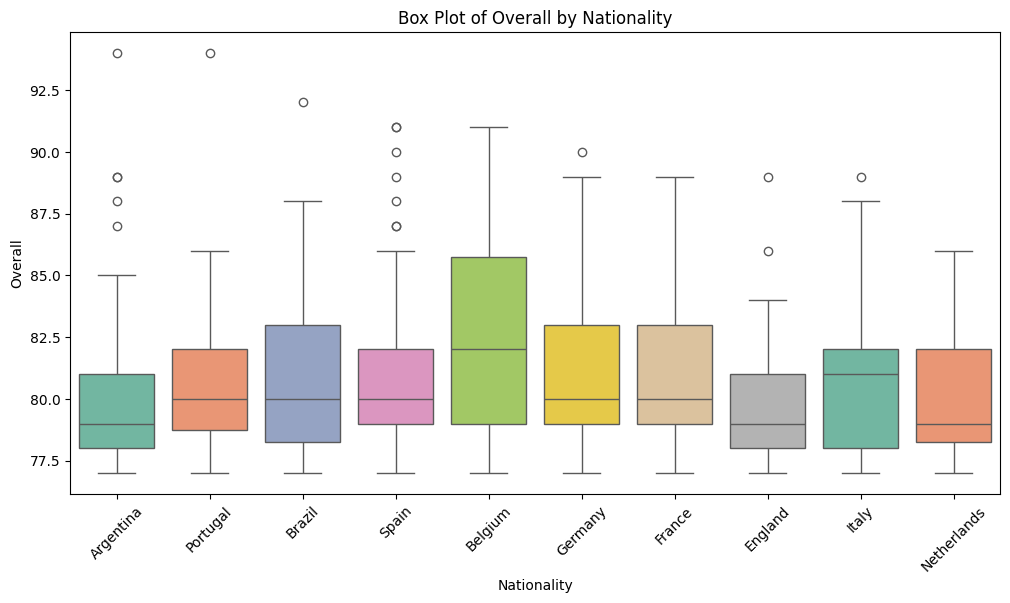

C:\Users\mahap\AppData\Local\Temp\ipykernel_17220\628790820.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data_filtered[categorical_column], y=data_filtered[numerical_column], palette="muted")


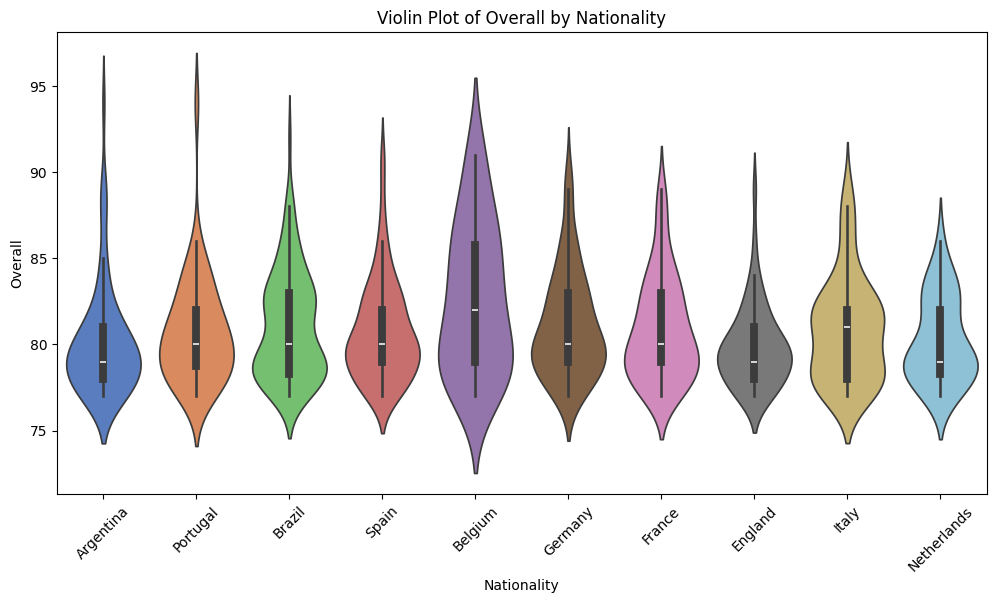

In [ ]:
categorical_column = 'Nationality'  # we can change as needed
numerical_column = 'Overall'  # we can change as needed
data_subset=data.iloc[:1001,:]
top_n = 10
top_categories = data_subset[categorical_column].value_counts().index[:top_n]
data_filtered = data_subset[data_subset[categorical_column].isin(top_categories)]

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_filtered[categorical_column], y=data_filtered[numerical_column], palette="Set2")
plt.xticks(rotation=45)
plt.title(f"Box Plot of {numerical_column} by {categorical_column}")
plt.show()

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x=data_filtered[categorical_column], y=data_filtered[numerical_column], palette="muted")
plt.xticks(rotation=45)
plt.title(f"Violin Plot of {numerical_column} by {categorical_column}")
plt.show()
